# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

#### Tecnológico de Monterrey

#### Prof Luis Eduardo Falcón Morales

### Adtividad de Semanas 6 y 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre y Matrícula de integrantes del Equipo:**


*   Erick Alan Cuellar Quintanilla A01383577
*   Elemento de lista
*   Elemento de lista


# **Introducción**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo que apareció en la revista *Journal of Business Research*, Moro et.al., de la editorial ELSEVIER. Descarga el archivo en formato PDF, el cual te ayudará a responder algunas de las preguntas de esta actividad (el artículo tiene acceso sin costo):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **En el resto de la actividad pueden agregar más celdas y líneas de código cuando así lo consideren adecuado.**

In [45]:
# Incluir las librerías que consideren necesarias ...


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [23]:
# Cargamos los datos del archivo:

# data = pd.read_csv(r'C:\Coding\Masters\AI-ML\Week 6\facebook+metrics\dataset_Facebook.csv', sep=';', header='infer')
data = pd.read_csv(r'/content/dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


# **Ejercicio 1**


### **Contesta las siguientes preguntas basándote en la información del artículo de Moro et.al.**



## **Ejercicio 1-a:**

*   **¿Cuál es el problema y el objetivo a resolver que se describe en el artículo?**  

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El problema descrito es la falta de sistemas que puedan predecir el impacto de una publicación en redes sociales antes de ser publicada. Cuando se publica algo, se suele tomar la decisión basado en la experiencia o el análisis de resultados previos, pero no de una predicción cuantitativa del rendimiento futuro.

El objetivo es implementar un sistema predictivo basado en la minería de datos, evaluar los modelos con distintas métricas de rendimiento, identificar las variables con mayor influencia, y relacionar los hallazgos con brand building, para mejorar el reconocimiento de la marca y generar lealtad hacia ella.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 1-b:**

*   **Describe a continuación el significado de las 19 variables de acuerdo a la información de las Tablas 1, 2 y 3 del artículo.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++




1.   **Lifetime Post Total Reach: El número de personas únicas que vieron una publicación de la página.**
2.   **Lifetime Post Total Impressions: El número de veces que una publicación de la página se mostró en la pantalla de los usuarios.**
3.   **Lifetime Engaged Users: El número de personas únicas que hicieron clic en la publicación**
4.   **Lifetime Post Consumers: El número de personas únicas que interactuaron publicación (like/comentarios/compartidos/respuestas/vistas de imagenes o videos únicamente)**
5.   **Lifetime Post Consumptions: El número de interacciones con la publicación**
6.   **Lifetime Post Impressions by people who have liked a Page: Número total de visualizaciones de personas a las que les gusta la página.**
7.   **Lifetime Post Reach by people who like your Page: El número de personas únicas que vieron una publicación porque le habían dado like a la página**
8.   **Lifetime Engaged Users: El número de personas únicas que hicieron clic en la publicación**
9.   **Lifetime people who have liked your Page and engaged with your post: El número de personas a las que les gusta la página y que hicieron clic en la publicación.**
10.  **Comments: Número de comentarios que recibió la publicación.**
11.  **Likes: Número de "Me gusta" que recibió la publicación.**
12.  **Shares: Número de veces que la publicación fue compartida**
13.  **Total interactions: Suma de "Likes", "Comments" y "Shares" de una publicación.**
14.  **Category: Categorización del contenido de la publicación, relacionada con el tipo de campaña de marketing.**
15.  **Page total likes: Número total de "Me gusta" que la página de la empresa tenía en el momento en que se realizó la publicación.**
16.  **Post Month: El mes en que se realizó la publicación.**
17.  **Post Hour: La hora del día en que se realizó la publicación.**
18.  **Post Weekday: El día de la semana en que se realizó la publicación.**
19. **Paid: Indica si la empresa pagó a Facebook para promocionar la publicación.**



### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2**

### **Variables relacionadas con el tiempo**

### **Recordemos que algunas variables relacionadas con información del tiempo (como estación, mes, día, hora) pueden considerarse como variables categóricas o numéricas cíclicas, dependiendo del contexto y decisión del analista. En particular, para el caso de este problema las variables mes, día de la semana y hora en que se puso el post, podrían considerarse como variables categóricas ordinales o nominales. Sin embargo, para fines de este Actividad las van a transformar a numéricas cíclicas, como se les indica a continuación.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable *Post_hour* está etiquetada de 0 a 23, por lo que las 24 horas sería equivalente a las 0 horas. Es decir, se tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. De manera análoga se aplica este razonamiento a las variables mes y día de la semana para poder ser consideradas como cíclicas.**

### **En la misma Tabla 3 del artículo se menciona que las variables *Post_month* y *Post_hour* están registradas con los nombres de los meses y de cada día de la semana. Sin embargo, en el archivo en realidad se observa que están capturadas como numéricas del 1 al 12 y del 1 al 7, respectivamente.**


## **Ejercicio 2-a:**

* **Investiga y escribe a continuación las fórmulas de cómo se transforma una variable temporal cíclica T, de periodicidad M, en dos nuevas variables usando funciones trigonométricas.**  

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para transformar una variable cíclica T con periodicidad M en dos nuevas variables usando funciones trigonométricas, se utilizan las siguientes fórmulas:

$$T_{sin} = \sin\left(\frac{2\pi \cdot T}{M}\right)$$

$$T_{cos} = \cos\left(\frac{2\pi \cdot T}{M}\right)$$

Donde:
- $T$ es el valor de la variable temporal original
- $M$ es el período de la variable (por ejemplo, 24 para horas, 7 para días de la semana, 12 para meses)
- $2\pi$ representa una vuelta completa en radianes


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-b:**

* **Explica por qué deben utilizarse dos funciones trigonométricas en la transformación de variables cíclicas, en lugar de solo una. Incluye un ejemplo numérico cualquiera que ayude a clarificar tu respuesta.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

La representacion cíclica de los datos se puede apreciar visualmente como un círculo. Si colocamos un circulo con centro en el origen en un plano cartesiano, para todo valor de x en el que exista el círculo (sin contar los límites), tendremos dos posibles valores de y, por lo cual no podríamos distinguir entre ciertos valores de nuestra variable.

Consideremos las horas del día (período M=24):
- Hora 3: sin(2π·3/24) ≈ 0.707
- Hora 9: sin(2π·9/24) ≈ 0.707

En este caso, nuestro modelo no distinguiría entre las 3am y 9am, por lo que dependemos de otra función que para obtener valores únicos para cada hora del día (variable x, o T en nuestro ejemplo).

- Hora 3: cos(2π·3/24) ≈ 0.707
- Hora 9: cos(2π·9/24) ≈ -0.707

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-c:**

* **Una vez transformada una variable temporal con las dos funciones trigonométricas, cuál sería la recomendación para esta variable original, ¿seguirla manteniendo en el DataFrame o eliminarla? Justifica tu respuesta.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede eliminar del dataframe, pues ya tiene toda la información necesaria de la variable original en nuestras nuevas variables cíclicas, no queremos agregar dimensionalidad innecesariamente.
Además, nuestro objetivo principal de convertirla en una variable cíclica es contradictorio a mantener nuestra variable lineal.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-d:**

* **Enumera al menos tres ventajas y tres desventajas de usar una representación de las variables temporales en términos de dos funciones trigonométricas.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Ventajas:**
 * Evita una descontinuidad que normalmente ocurriría entre los primeros y últimos valores.
 * Facilita que los modelos puedan capturar patrones cíclicos que podrían necesitar de polinomios complejos de otra manera.
 * Se mantiene el orden secuencial de los datos.

**Desventajas:**
 * Es más dificil interpretar un número en términos de una función trigonométrica, así como el análisis de dos variables en lugar de una
 * Ignora tendencias a largo plazo, como la inflación o el aumento/disminución de usuarios de una plataforma
 * Asume que el ciclo muestra el mismo comportamiento siempre, cuando podría haber sesgos en ciertos tiempos dependiendo de la naturaleza del problema (como las horas cuando se está analizando el tráfico, o festividades a lo largo del año).


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-e:**

* **¿Qué riesgos éticos podrían estar surgiendo en un problema si no se representa correctamente una variable temporal? Responde con base al contexto de este problema e incluye otro ejemplo donde también pudiera existir un problema ético al no transformar adecuadamente una variable cíclica.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En este caso, si no se considera correctamente la ciclicidad de la variable, podría sesgar publicaciones en los horarios nocturnos, lo cual afecta a a ciertos grupos demográficos que pueden ser más activos durante estas horas. Esto podría traer desigualdad en el acceso a la información u oportunidades, afectando directamente a estos grupos demográficos.

En otros casos, como sistemas de policía predictiva, pueden fallar identificando patrones delictivos que ocurren durante la noche/madrugada, o al final/inicio de la semana, asignando incorrectamente los recursos y dejando zonas desprotegidas en momentos críticos.


### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 3**

In [24]:
# Ejercicio 3a.

# Transforma la variable "Post Hour" incluyendo las variables
# hour_sin, hour_cos y eliminando la original.


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

hour_sin = np.sin(2 * np.pi * data['Post Hour'] / 24)
hour_cos = np.cos(2 * np.pi * data['Post Hour'] / 24)

data['hour_sin'] = hour_sin
data['hour_cos'] = hour_cos
data = data.drop(columns=['Post Hour'])

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++


In [25]:
# Ejercicio 3b.

# Transforma la variable "Post Weekday" incluyendo las variables
# day_sin, day_cos y eliminando la original.


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

day_sin = np.sin(2 * np.pi * data['Post Weekday'] / 7)
day_cos = np.cos(2 * np.pi * data['Post Weekday'] / 7)

data['day_sin'] = day_sin
data['day_cos'] = day_cos
data = data.drop(columns=['Post Weekday'])

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [26]:
# Ejercicio 3c.

# Transforma la variable "Post Month" incluyendo las variables
# month_sin, month_cos y eliminando la original.


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

month_sin = np.sin(2 * np.pi * data['Post Month'] / 12)
month_cos = np.cos(2 * np.pi * data['Post Month'] / 12)

data['month_sin'] = month_sin
data['month_cos'] = month_cos
data = data.drop(columns=['Post Month'])


# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [27]:
# Veamos lo que tenemos hasta el momento:
print("Dimensión del conjunto de datos:",data.shape)
data.head(3).T

Dimensión del conjunto de datos: (500, 22)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113
Lifetime Post Consumptions,159,1674,154
Lifetime Post Impressions by people who have liked your Page,3078,11710,2812


In [28]:
# De las Tablas 2 y 3 del artículo de Moro et.al. seleccionamos las variables que
# trabajaremos en esta Actividad y con las transformaciones que se acaban de hacer.

# Para esta Actividad se trabajará con la variable de salida "Lifetime Post Consumers",
# que es una de las variables de salida con las que los autores del artículo
# reportaron que obtuvieron uno de los mejores resultados.

X = data[['Page total likes', 'Type', 'Category', 'Paid',
          'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']]
y = data[['Lifetime Post Consumers']]

# Particionemos como se indica a continuación en Train, Val y Test:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True, random_state=5)

print('Train:', Xtrain.shape, ytrain.shape)
print('Train:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (375, 10) (375, 1)
Train: (62, 10) (62, 1)
Test: (63, 10) (63, 1)


# **Ejercicio 4**

* **Realiza un análisis de la variable de salida y aplicarle la transformación que consideres más adecuada a los conjuntos Train, Val y Test. A las nuevas variables llamarlas ytrain2, yval2 y ytest2.**

In [29]:
# Ejercicio 4.

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

boxcox = PowerTransformer(method='yeo-johnson', standardize=True)

ytrain2 = pd.DataFrame(boxcox.fit_transform(ytrain), columns=ytrain.columns)
yval2 = pd.DataFrame(boxcox.transform(yval), columns=yval.columns)
ytest2 = pd.DataFrame(boxcox.transform(ytest), columns=ytest.columns)

# # Plotear histogramas de las variables originales y transformadas
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.hist(ytrain, bins=30, color='blue', alpha=0.7)
# plt.title('Histograma de ytrain (original)')
# plt.subplot(1,2,2)
# plt.hist(ytrain2, bins=30, color='green', alpha=0.7)
# plt.title('Histograma de ytrain2 (Box-Cox)')
# plt.show()

# ++++++++++++++ Termina sección de agregar código ++++++++++++++++++


# **Ejercicio 5**

* **En la Figura 5 del artículo de Moro et.al. se indica que no se cuenta con un valor de partida para el modelo base (Baseline) de acuerdo a la experiencia que se tiene del problema y en particular con respecto a la métrica MAPE.**

* **Sin embargo, para fines de esta actividad y ya que utilizaremos las curvas de aprendizaje, nos basaremos en el error cuadrático medio MSE, para supervisar que nuestros modelos no queden sub-entrenados o sobre-entrenados durante el entrenamiento.**


In [30]:
# Ejercicio 5

# Obtener el umbral del problema a resolver con base a la métrica MSE
# y a la variable de salida con la transformación aplicada.
# Llamar "mse_baseline" al valor de dicho umbral.


# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++
from sklearn.metrics import mean_squared_error

baseline_prediction = ytrain2.mean()
mse_baseline = mean_squared_error(yval2, np.full(yval2.shape, baseline_prediction))

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++


# Imprimimos el valor de la métrica MSE del modelo base:

print(f"MSE Baseline (promedio) con Y transformada: {mse_baseline:.2f}")


MSE Baseline (promedio) con Y transformada: 0.79


# **Ejercicio 6**

* **Realiza un análisis de las variables de entrada y determina qué transformaciones sería adecuado aplicar a cada una. En particular, para las variables categóricas verifica si cada nivel cumple el criterio de tener al menos un 5% de información.**

NOTA: Se aplicará posteriormente un Pipeline para conjuntar las transformaciones de las variables de entrada, por lo que por el momento no es necesario transformar los datos de los conjuntos Val y Test.

In [31]:
# Ejercicio 6

# Análisis de variables

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

categorical_vars = ['Type', 'Category', 'Paid']


# Cambiar las categorías con menos del 5% a 'Other'
for var in categorical_vars:
    dist = Xtrain[var].value_counts() * 100 / len(Xtrain)
    rare_categories = dist[dist < 5.0].index

    print(f"\nDistribución de la variable '{var}':")
    print(dist)
    if dist.min() < 5.0:
        print(f"  -> La variable '{var}' tiene categorías con menos del 5%")
        print(f"     -> Categorías raras: {list(rare_categories)}")
        print(f"     -> Reemplazando por 'Other'...\n")

    Xtrain[var] = Xtrain[var].replace(rare_categories, 'Other')
    Xval[var] = Xval[var].replace(rare_categories, 'Other')
    Xtest[var] = Xtest[var].replace(rare_categories, 'Other')



# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++



Distribución de la variable 'Type':
Type
Photo     85.066667
Status     9.333333
Link       4.000000
Video      1.600000
Name: count, dtype: float64
  -> La variable 'Type' tiene categorías con menos del 5%
     -> Categorías raras: ['Link', 'Video']
     -> Reemplazando por 'Other'...


Distribución de la variable 'Category':
Category
1    42.133333
3    31.466667
2    26.400000
Name: count, dtype: float64

Distribución de la variable 'Paid':
Paid
0.0    69.866667
1.0    29.866667
Name: count, dtype: float64


# **Ejercicio 7**

* **Define a continuación las transformaciones de las variables de entrada que determinaste son las más adecuadas y usando la clase Pipeline para evitar el filtrado de información.**

In [32]:
# Ejercicio 7

# Incluye a continuación las transformaciones a las variables numéricas
# y categóricas usando la clase Pipeline y conjuntando todas en la
# variable que llamaremos "columnasTransformer".

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

trig_vars = ['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']

all_vars = Xtrain.columns.tolist()
numerical_vars = [var for var in all_vars if var not in categorical_vars + trig_vars]

print("Variables numéricas:", numerical_vars)
print("Variables categóricas:", categorical_vars)
print("Variables trigonométricas:", trig_vars)

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

columnasTransformer = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_vars),
        ('num', numeric_pipeline, numerical_vars)
    ],
    remainder='passthrough'
)

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++


# Visualicemos las transformaciones incluídas:
columnasTransformer


Variables numéricas: ['Page total likes']
Variables categóricas: ['Type', 'Category', 'Paid']
Variables trigonométricas: ['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']


ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Type', 'Category', 'Paid']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Page total likes'])])

In [33]:
# A manera de información veamos la dimensión de las variables transformadas:

tmp = columnasTransformer.fit_transform(Xtrain)
print('Dimensión de las variables de entrada original:', Xtrain.shape)
print('Dimensión de las variables de entrada transformadas:', tmp.shape)


Dimensión de las variables de entrada original: (375, 10)
Dimensión de las variables de entrada transformadas: (375, 12)


In [34]:
# Como vamos a utilizar Validación Cruzada conjuntemos los conjuntos
# Train y Val en las nuevas variables llamadas Xtrainval y  ytrainval:

Xtrainval = pd.concat([Xtrain, Xval])
ytrainval2 = pd.concat([ytrain2, yval2])


# **Ejercicio 8**

In [35]:
Xtrain.head(3).T

,111,262,317
Page total likes,136736,128032,123047
Type,Photo,Photo,Photo
Category,1,2,2
Paid,0.0,0.0,0.0
month_sin,-0.866025,-0.5,0.0
month_cos,0.5,-0.866025,-1.0
day_sin,-0.781831,0.781831,-0.974928
day_cos,0.62349,0.62349,-0.222521
hour_sin,0.866025,0.707107,0.707107
hour_cos,-0.5,0.707107,0.707107


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejor modelo: -0.643522 usando {'m__max_depth': 7, 'm__min_samples_leaf': 1, 'm__min_samples_split': 2, 'm__n_estimators': 500}
MSE en Test: 0.5028
MSE Baseline: 0.7919
Mejora: 36.5%


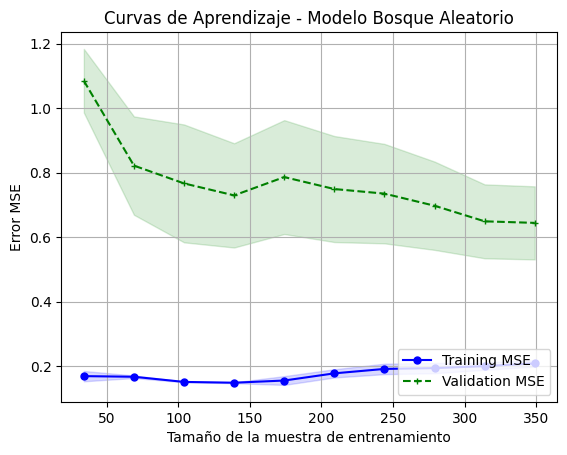

In [36]:
# Ejercicio 8

# Busca los mejores valores de hiperparámetros del modelo Bosque Aleatorio.
# Utiliza el mismo valor de la semilla que se indica.

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

param_grid = {
    'm__n_estimators': [500, 1000],
    'm__max_depth': [7, 13],
    'm__min_samples_split': [2, 4],
    'm__min_samples_leaf': [1, 3]
}

elmodelo_RF = RandomForestRegressor(random_state=1,
                                    n_jobs=-1
                                    max_item = 10000,
                                    early_stopping = True,
                                    validation_fraction = 0.1,
                                    )

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_result = grid_search.fit(Xtrainval, np.ravel(ytrainval2))

best_model = grid_result.best_estimator_

# Now evaluate on the test set
ytest_hat = best_model.predict(Xtest)
mse_test = mean_squared_error(ytest2, ytest_hat)

print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline: {mse_baseline:.4f}")
print(f"Mejora: {((mse_baseline - mse_test) / mse_baseline * 100):.1f}%")


best_params_rf = {k.replace('m__', ''): v for k, v in grid_result.best_params_.items()}

modelo_RF = RandomForestRegressor(random_state=1,
                                    n_jobs= -1,
                                    **best_params_rf

                                    )



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', modelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainval2),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# La siguiente información es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_mse = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_mse = np.std(mse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_mse, train_mean - train_mse, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_mse, val_mean - val_mse, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - Modelo Bosque Aleatorio')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# **Ejercicio 9**

### **Repite el mismo proceso hecho en el ejercicio del Bosque Aleatorio para encontrar la mejor versión de cada uno de los siguientes modelos:**

*   **9a) Extreme Gradient Boost XGBoost**
*   **9b) Máquina de Vector Soporte SVM**
*   **9c) Red Neuronal Perceptrón Multicapa MLP**

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejor modelo: -0.613750 usando {'m__colsample_bytree': 0.6, 'm__learning_rate': 0.02, 'm__max_depth': 3, 'm__n_estimators': 350, 'm__subsample': 0.6}
MSE en Test: 0.4978
MSE Baseline: 0.7919
Mejora: 37.1%


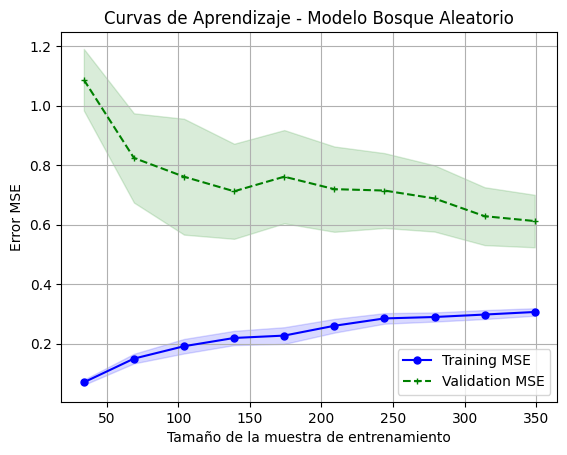

In [37]:
# Ejercicio 9a - XGBoost

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++

param_grid = {
    'm__n_estimators': [600, 400, 350],
    'm__max_depth': [3,6,9],
    'm__learning_rate': [0.01, 0.02, 0.03],
    'm__subsample': [0.5, 0.6],
    'm__colsample_bytree': [0.6]
}

modelo_XGB = XGBRegressor(random_state=1,
                          n_jobs=-1,
                          max_item = 10000,
                          early_stopping = True,
                          validation_fraction = 0.1,
                          )

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m', modelo_XGB)])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_result = grid_search.fit(Xtrainval, np.ravel(ytrainval2))

best_model = grid_result.best_estimator_

# Now evaluate on the test set
ytest_hat = best_model.predict(Xtest)
mse_test = mean_squared_error(ytest2, ytest_hat)

print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline: {mse_baseline:.4f}")
print(f"Mejora: {((mse_baseline - mse_test) / mse_baseline * 100):.1f}%")


best_params_xgb = {k.replace('m__', ''): v for k, v in grid_result.best_params_.items()}

elmodelo_XGB = XGBRegressor(random_state=1,
                                    n_jobs= -1,
                                    **best_params_xgb
                                    # None - Incluye aquí los ajustes deseados

                                    )



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainval2),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# La siguiente información es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_mse = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_mse = np.std(mse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_mse, train_mean - train_mse, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_mse, val_mean - val_mse, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - Modelo XGBoost')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()




Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejor modelo: -0.632418 usando {'m__C': 8, 'm__degree': 1, 'm__gamma': 0.09, 'm__kernel': 'rbf'}
MSE en Test: 0.5774
MSE Baseline: 0.7919
Mejora: 27.1%


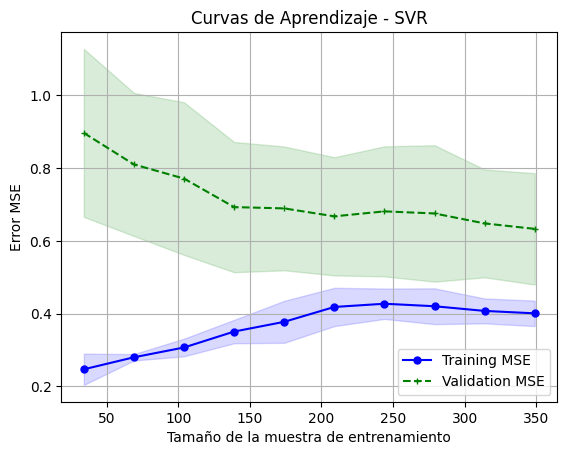

In [44]:
# Ejercicio 9b - SVM

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++

param_grid = {
    'm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'm__C': [ 8, 9, 50, 100],
    'm__gamma': [0.09, 0.1, 0.11],
    'm__degree': [1, 3, 5],
}

svr = SVR()

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m', svr)])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_result = grid_search.fit(Xtrainval, np.ravel(ytrainval2))

best_model = grid_result.best_estimator_

# Now evaluate on the test set
ytest_hat = best_model.predict(Xtest)
mse_test = mean_squared_error(ytest2, ytest_hat)

print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline: {mse_baseline:.4f}")
print(f"Mejora: {((mse_baseline - mse_test) / mse_baseline * 100):.1f}%")


best_params_svr = {k.replace('m__', ''): v for k, v in grid_result.best_params_.items()}

best_svr = SVR(**best_params_svr)



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', best_svr)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainval2),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# La siguiente información es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_mse = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_mse = np.std(mse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_mse, train_mean - train_mse, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_mse, val_mean - val_mse, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - SVR')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()







Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor modelo: -0.703065 usando {'m__activation': 'tanh', 'm__alpha': 0.1, 'm__hidden_layer_sizes': (15, 15)}
MSE en Test: 0.5496
MSE Baseline: 0.7919
Mejora: 30.6%


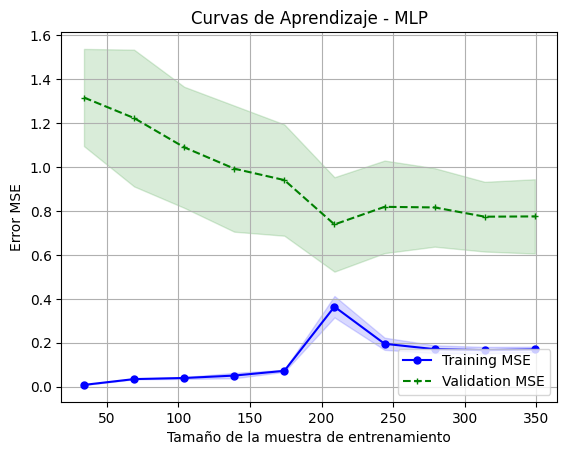

In [54]:
# Ejercicio 9c - MLP

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++


param_grid = {
    'm__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'm__alpha': [0.01, 0.05, 0.1],
    'm__hidden_layer_sizes': [(10,10), (15,15), (50,50)],
}

mlp = MLPRegressor(
    random_state = 1,
    max_iter=10000,
    early_stopping=True,
    validation_fraction=0.2,
)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m', mlp)])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_result = grid_search.fit(Xtrainval, np.ravel(ytrainval2))

best_model = grid_result.best_estimator_

# Now evaluate on the test set
ytest_hat = best_model.predict(Xtest)
mse_test = mean_squared_error(ytest2, ytest_hat)

print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline: {mse_baseline:.4f}")
print(f"Mejora: {((mse_baseline - mse_test) / mse_baseline * 100):.1f}%")


best_params_mlp = {k.replace('m__', ''): v for k, v in grid_result.best_params_.items()}

best_mlp = MLPRegressor(
              random_state = 1,
              max_iter=500
          )



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', best_mlp)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainval2),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# La siguiente información es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_mse = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_mse = np.std(mse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_mse, train_mean - train_mse, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_mse, val_mean - val_mse, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - MLP')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()









# **Ejercicio 10**

## **Ejercicio 10-a:**

* **Con la configuración del mejor modelo encontrado, realiza un análisis de características/factores para determinar qué factores ayudan a predecir mejor los valores de la variable de salida.**

In [ ]:
# Ejercicio 10a

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

None


# ++++++++++++++ Termina sección de agregar código ++++++++++++++++++


## **Ejercicio 10-b:**

* **Interpreta los resultados obtenidos con base al contexto del problema y compara tus resultados con los obtenidos en el artículo. En particular, ¿existen algunas coincidencias en cuanto a las variables que resultaron más importantes?**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None


### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 11**

### **Incluye tus conclusiones finales de los resultados obtenidos y de la Actividad en general.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


None


### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Fin de la Actividad de mercadotecnia en redes sociales**